# p01: Convergence of fourth order finite differences

Let us compute the derivative of
$$
u(x) = \exp(\sin(x)), \qquad x \in [-\pi,\pi]
$$
using fourth order finite difference scheme
$$
u'(x_j) \approx w_j = \frac{1}{h} \left( \frac{1}{12} u_{j-2} - \frac{2}{3} u_{j-1} + \frac{2}{3} u_{j+1} - \frac{1}{12} u_{j+2} \right)
$$
using periodic boundary conditions.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from scipy.sparse import coo_matrix
from numpy import arange,pi,exp,sin,cos,ones,inf
from numpy.linalg import norm
from matplotlib.pyplot import figure,loglog,hold,semilogy,text,grid,xlabel,ylabel,title

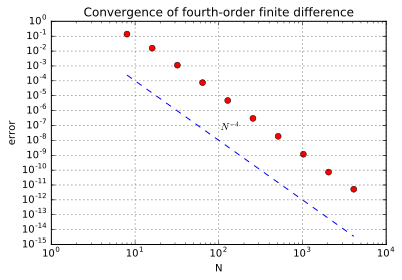

In [4]:
Nvec = 2**arange(3,13)
for N in Nvec:
    h = 2*pi/N
    x = -pi + arange(1,N+1)*h
    u = exp(sin(x))
    uprime = cos(x)*u
    e = ones(N)
    e1 = arange(0,N)
    e2 = arange(1,N+1); e2[N-1]=0
    e3 = arange(2,N+2); e3[N-2]=0; e3[N-1]=1;
    D = coo_matrix((2*e/3,(e1,e2)),shape=(N,N)) \
        - coo_matrix((e/12,(e1,e3)),shape=(N,N))
    D = (D - D.T)/h
    error = norm(D.dot(u)-uprime,inf)
    loglog(N,error,'or')
    hold(True)
    
semilogy(Nvec,Nvec**(-4.0),'--')
text(105,5e-8,'$N^{-4}$')
grid(True)
xlabel('N')
ylabel('error')
title('Convergence of fourth-order finite difference');